<a href="https://colab.research.google.com/github/mohamedahshaan/MachineLearning_CW/blob/main/CM2604_ML_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CM2604 – Machine Learning Coursework
## Telco Customer Churn Prediction
### By: Mohamed Ahshaan

This Notebook Includes:
- Task 1: Exploratory Data Analysis (EDA)
- Task 2: Decision Tree & Neural Network Models
- Task 3: AI Ethics


# Import Libraries

In [17]:

# Core data handling
import pandas as pd
import numpy as np

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing tools
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Pipeline + model selection
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline

# Machine learning models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score, roc_curve
)

# Display utility
from IPython.display import display

# Style
sns.set(style="whitegrid")


# TASK - 01 | Exploratory Data Analysis

In [18]:
# Load dataset
try:
    df = pd.read_csv("Telco_Customer_Churn.csv")
    print("Dataset loaded successfully. Shape:", df.shape)
except:
    print("Dataset not found. Please upload Telco_Customer_Churn.csv")

Dataset loaded successfully. Shape: (7043, 21)


In [19]:
# ============================================
# Basic Cleaning + Dataset Information
# ============================================

# Convert TotalCharges to numeric (Some values contain spaces → NaN)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Fill missing TotalCharges with median (prevents bias from extreme values)
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

# Convert Churn to numerical (Yes - 1, No - 0) for modelling
df["Churn"] = df["Churn"].map({"Yes":1, "No":0})

# Display dataset structure
print("=== Dataset Info ===")
df.info()

# Check for missing values in all columns
print("\n=== Missing Values ===")
print(df.isnull().sum())


=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  704


Churn counts: {0: 5174, 1: 1869}
Churn %: {0: 73.46, 1: 26.54}


/tmp/ipython-input-4112037540.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["No","Yes"])


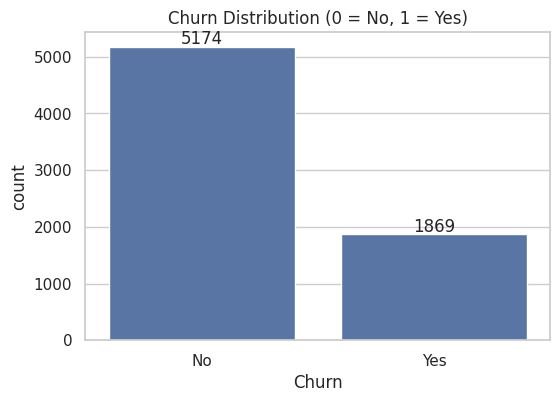

In [20]:
# ============================================
# Churn Count + Percentage + Bar Chart
# ============================================

# Count churners and non-churners
churn_counts = df["Churn"].value_counts()
churn_percent = (churn_counts / len(df) * 100).round(2)

print("\nChurn counts:", churn_counts.to_dict())
print("Churn %:", churn_percent.to_dict())

# Plot churn distribution
plt.figure(figsize=(6,4))
ax = sns.countplot(x="Churn", data=df)
ax.set_title("Churn Distribution (0 = No, 1 = Yes)")
ax.set_xticklabels(["No","Yes"])

# Add numeric labels on top of bars
for p in ax.patches:
    height = int(p.get_height())
    ax.text(p.get_x()+p.get_width()/2, height + 50, height, ha="center")

plt.show()
